In [1]:
import glob, json
import os

root_dir = os.path.dirname(os.getcwd())

with open(f"{root_dir}/data/opendialkg/entity2id.json", 'r', encoding="utf-8") as f:
    entity2id = json.load(f)

def get_result(sample_result_path):
    sample_result = json.load(open(sample_result_path))
    dialog = sample_result['simulator_dialog']['context']
    rec_label = sample_result['rec']
    prev_turn_num = sample_result['turn_id']
    length = len(dialog)
    rec_success_rec_eval = False
    
    # dialog = sample_result['simulator_dialog']
    for idx, turn in enumerate(dialog[::-1]):
        if 'rec_success' in turn:
            rec_success = turn['rec_success']
            rec_labels = [entity2id[rec] for rec in rec_label if rec in entity2id]
            rec_items = turn['rec_items']
            
            for rec_label in rec_labels:
                if rec_label in rec_items:
                    rec_success_rec_eval = True
                    break 
                
            if rec_success != rec_success_rec_eval:
                print(sample_result_path)
            
            return rec_success, length, prev_turn_num, idx
    
folder_path = "/home/work/shchoi/iEvaLM-CRS/save_5/user_Llama-3.1-8B-Instruct/emb_sentence-transformers/all-MiniLM-L6-v2/openmodel_Llama-3.2-1B-Instruct_top10_full_history/opendialkg_eval/full_non_repeated/train"
results_path = glob.glob(folder_path + '/*.json')
print(f'The number of results: {len(results_path)}')

rec_success_list = []
for result_path in results_path:
    # print(result_path)
    rec_success, length, prev_turn_num, idx = get_result(result_path)
    if rec_success:
        additional_turn = (length - prev_turn_num) // 2
        rec_success_list.append(additional_turn)
print(len(rec_success_list))

rec_success_dict = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0,
}

for rec_success in rec_success_list:
    if rec_success == 1:
        rec_success_dict["1"] += 1
    elif rec_success == 2:
        rec_success_dict["2"] += 1
    elif rec_success == 3:
        rec_success_dict["3"] += 1
    elif rec_success == 4:
        rec_success_dict["4"] += 1
    elif rec_success == 5:
        rec_success_dict["5"] += 1

# for rec_success in rec_success_list:
#     if rec_success == 1:
#         rec_success_dict["1"] += 1
#         rec_success_dict["2"] += 1
#         rec_success_dict["3"] += 1
#         rec_success_dict["4"] += 1
#         rec_success_dict["5"] += 1
#     elif rec_success == 2:
#         rec_success_dict["2"] += 1
#         rec_success_dict["3"] += 1
#         rec_success_dict["4"] += 1
#         rec_success_dict["5"] += 1
#     elif rec_success == 3:
#         rec_success_dict["3"] += 1
#         rec_success_dict["4"] += 1
#         rec_success_dict["5"] += 1
#     elif rec_success == 4:
#         rec_success_dict["4"] += 1
#         rec_success_dict["5"] += 1
#     elif rec_success == 5:
#         rec_success_dict["5"] += 1
        
for key, value in rec_success_dict.items():
    rec_success_dict[key] = value / len(results_path)

The number of results: 3560
2144


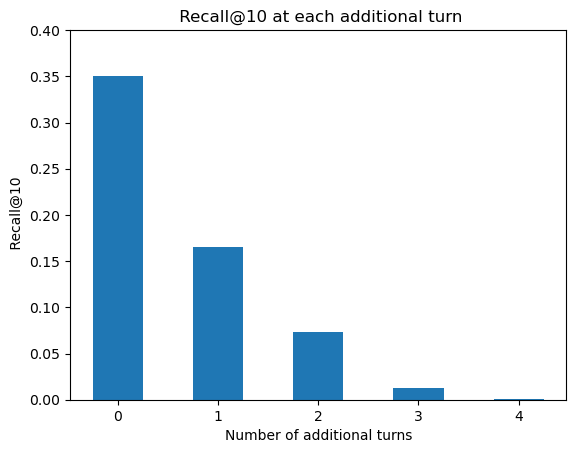

In [ ]:
# visualize the rec_success_dict
import matplotlib.pyplot as plt

x = rec_success_dict.keys()
x = [int(key) - 1 for key in x]

bars = plt.bar(x, rec_success_dict.values(), width=0.5,)
plt.ylabel(' Recall@10')
plt.yticks([0.05 * idx for idx in range(8)])
plt.xlabel('Number of additional turns')
plt.title(' Recall@10 at each additional turn')

plt.show()




